This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Introduction to Keras and TensorFlow

## What's TensorFlow?

## What's Keras?

## Keras and TensorFlow: A brief history

## Setting up a deep-learning workspace

### Jupyter notebooks: The preferred way to run deep-learning experiments

### Using Colaboratory

#### First steps with Colaboratory

#### Installing packages with pip

#### Using the GPU runtime

## First steps with TensorFlow

#### Constant tensors and variables

**All-ones or all-zeros tensors**

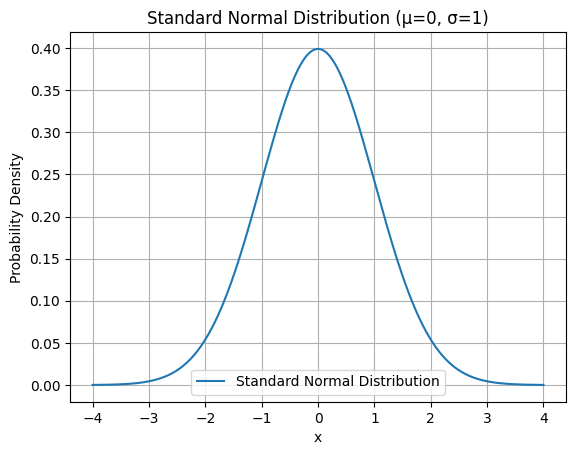

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define the standard normal distribution (mean=0, std=1)
x = np.linspace(-4, 4, 1000)  # Range of x values
y = (1 / np.sqrt(2 * np.pi)) * np.exp(-x**2 / 2)  # PDF of standard normal

# Plot the distribution
plt.plot(x, y, label='Standard Normal Distribution')
plt.title('Standard Normal Distribution (μ=0, σ=1)')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.grid(True)
plt.legend()
plt.show()

In [8]:
x.shape, y.shape

((1000,), (1000,))

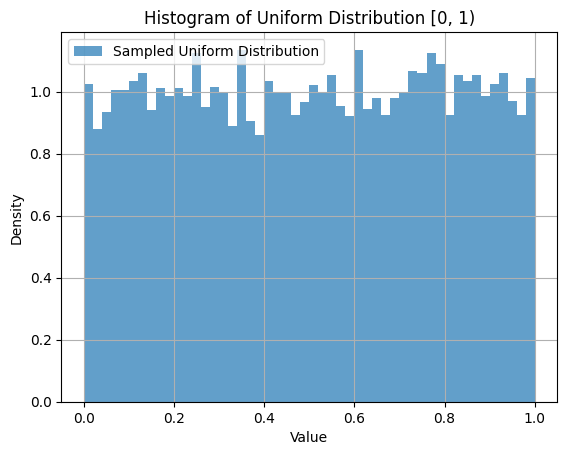

In [16]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Generate 10,000 samples from a uniform distribution
samples = tf.random.uniform(shape=(10000, 1), minval=0., maxval=1.)

# Convert to numpy for plotting
samples_np = samples.numpy().flatten()

# Plot histogram
plt.hist(samples_np, bins=50, density=True, alpha=0.7, label='Sampled Uniform Distribution')
plt.title('Histogram of Uniform Distribution [0, 1)')
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(True)
plt.legend()
plt.show()

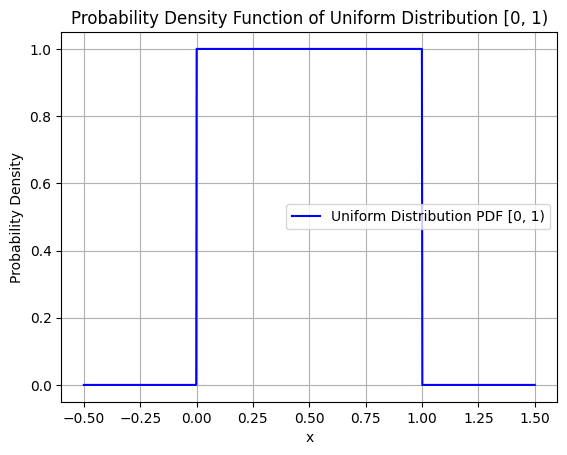

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Define the x and y values for the PDF
x = np.linspace(-0.5, 1.5, 1000)  # Extend beyond [0, 1) for clarity
y = np.where((x >= 0) & (x < 1), 1.0, 0.0)  # PDF is 1 in [0, 1), 0 elsewhere

# Plot the PDF
plt.plot(x, y, label='Uniform Distribution PDF [0, 1)', color='blue')
plt.title('Probability Density Function of Uniform Distribution [0, 1)')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.grid(True)
plt.legend()
plt.show()

In [2]:
import tensorflow as tf
x = tf.ones(shape=(2, 1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [3]:
x = tf.zeros(shape=(2, 1))
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


**Random tensors**

In [14]:
x = tf.random.normal(shape=(10, 1), mean=0., stddev=1.)
print(x)

tf.Tensor(
[[ 0.3418796 ]
 [-1.5671768 ]
 [-1.7340753 ]
 [-0.25549012]
 [-0.07436227]
 [ 0.6963653 ]
 [-0.06165373]
 [-0.3991309 ]
 [ 0.4768614 ]
 [-1.2738225 ]], shape=(10, 1), dtype=float32)


In [15]:
x = tf.random.uniform(shape=(10, 1), minval=0., maxval=1.)
print(x)

tf.Tensor(
[[0.84692454]
 [0.4416226 ]
 [0.95782864]
 [0.6179352 ]
 [0.95655215]
 [0.24622202]
 [0.29799998]
 [0.6786804 ]
 [0.5968813 ]
 [0.7907145 ]], shape=(10, 1), dtype=float32)


**NumPy arrays are assignable**

In [19]:
import numpy as np
x = np.ones(shape=(2, 2))
x[0, 0] = 0.
x

array([[0., 1.],
       [1., 1.]])

**Creating a TensorFlow variable**

In [20]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[ 2.0844595 ],
       [-0.16332212],
       [-0.32547498]], dtype=float32)>


In [22]:
#help(tf.random.normal)

**Assigning a value to a TensorFlow variable**

In [23]:
v.assign(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

**Assigning a value to a subset of a TensorFlow variable**

In [24]:
v[0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

**Using `assign_add`**

In [25]:
v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

#### Tensor operations: Doing math in TensorFlow

**A few basic math operations**

In [28]:
a = tf.ones((2, 2))
b = tf.square(a)
print(b)
c = tf.sqrt(a)
print(c)
d = b + c
e = tf.matmul(a, b)
print(e)
# multiply element-wise
e *= d
print(e)

tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[4. 4.]
 [4. 4.]], shape=(2, 2), dtype=float32)


#### A second look at the GradientTape API

**Using the `GradientTape`**

In [30]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
   result = tf.square(input_var)
gradient = tape.gradient(result, input_var)
gradient

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

**Using `GradientTape` with constant tensor inputs**

In [31]:
input_const = tf.constant(3.)
print(input_const)
with tf.GradientTape() as tape:
   tape.watch(input_const)
   result = tf.square(input_const)
gradient = tape.gradient(result, input_const)
gradient

tf.Tensor(3.0, shape=(), dtype=float32)


<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

**Using nested gradient tapes to compute second-order gradients**

In [35]:
time = tf.Variable(10.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        # y = (g/2)t**2 where g = 9.8m/ss
        position =  4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)
speed, acceleration

(<tf.Tensor: shape=(), dtype=float32, numpy=98.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=9.800000190734863>)

#### An end-to-end example: A linear classifier in pure TensorFlow

**Generating two classes of random points in a 2D plane**

In [36]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

**Stacking the two classes into an array with shape (2000, 2)**

In [37]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

**Generating the corresponding targets (0 and 1)**

In [38]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

**Plotting the two point classes**

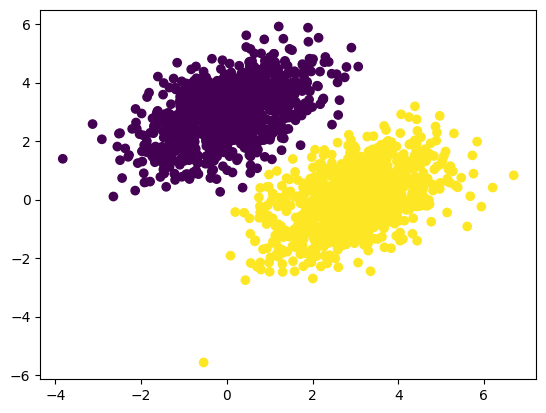

In [39]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

**Creating the linear classifier variables**

In [40]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

**The forward pass function**

In [41]:
def model(inputs):
    return tf.matmul(inputs, W) + b

**The mean squared error loss function**

In [42]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

**The training step function**

In [43]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

**The batch training loop**

In [44]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 2.3301
Loss at step 1: 0.1419
Loss at step 2: 0.1015
Loss at step 3: 0.0914
Loss at step 4: 0.0853
Loss at step 5: 0.0800
Loss at step 6: 0.0752
Loss at step 7: 0.0709
Loss at step 8: 0.0669
Loss at step 9: 0.0633
Loss at step 10: 0.0600
Loss at step 11: 0.0569
Loss at step 12: 0.0542
Loss at step 13: 0.0517
Loss at step 14: 0.0494
Loss at step 15: 0.0473
Loss at step 16: 0.0454
Loss at step 17: 0.0436
Loss at step 18: 0.0420
Loss at step 19: 0.0406
Loss at step 20: 0.0393
Loss at step 21: 0.0381
Loss at step 22: 0.0370
Loss at step 23: 0.0360
Loss at step 24: 0.0350
Loss at step 25: 0.0342
Loss at step 26: 0.0334
Loss at step 27: 0.0327
Loss at step 28: 0.0321
Loss at step 29: 0.0315
Loss at step 30: 0.0310
Loss at step 31: 0.0305
Loss at step 32: 0.0301
Loss at step 33: 0.0297
Loss at step 34: 0.0293
Loss at step 35: 0.0290
Loss at step 36: 0.0287
Loss at step 37: 0.0284
Loss at step 38: 0.0281
Loss at step 39: 0.0279


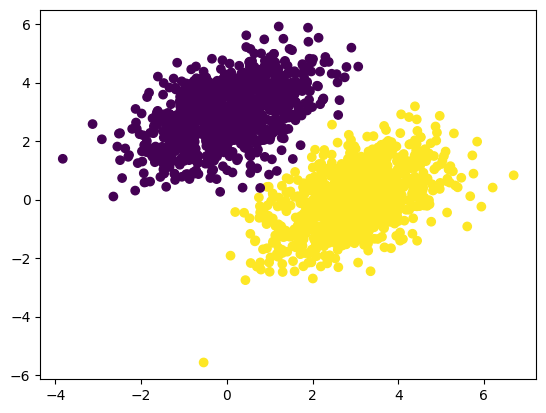

In [45]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

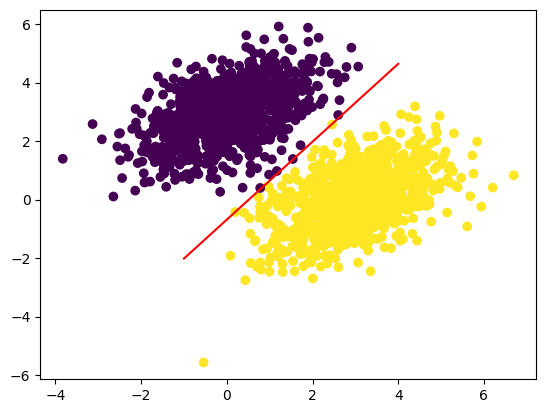

In [46]:
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

## Anatomy of a neural network: Understanding core Keras APIs

### Layers: The building blocks of deep learning

#### The base Layer class in Keras

**A `Dense` layer implemented as a `Layer` subclass**

In [47]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer):

    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),
                                 initializer="random_normal")
        self.b = self.add_weight(shape=(self.units,),
                                 initializer="zeros")

    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

In [48]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

(2, 32)


#### Automatic shape inference: Building layers on the fly

In [49]:
from tensorflow.keras import layers
layer = layers.Dense(32, activation="relu")

In [50]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32)
])

In [51]:
model = keras.Sequential([
    SimpleDense(32, activation="relu"),
    SimpleDense(64, activation="relu"),
    SimpleDense(32, activation="relu"),
    SimpleDense(10, activation="softmax")
])

### From layers to models

### The "compile" step: Configuring the learning process

In [52]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer="rmsprop",
              loss="mean_squared_error",
              metrics=["accuracy"])

In [53]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

### Picking a loss function

### Understanding the fit() method

**Calling `fit()` with NumPy data**

In [54]:
history = model.fit(
    inputs,
    targets,
    epochs=5,
    batch_size=128
)

Epoch 1/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.4889 - loss: 8.9275  
Epoch 2/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.5007 - loss: 8.3520 
Epoch 3/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.4964 - loss: 7.8962 
Epoch 4/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.4997 - loss: 7.5745 
Epoch 5/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.5154 - loss: 7.1508 


In [55]:
history.history

{'binary_accuracy': [0.492000013589859,
  0.492000013589859,
  0.492000013589859,
  0.492000013589859,
  0.492000013589859],
 'loss': [8.723505020141602,
  8.268178939819336,
  7.884676456451416,
  7.517735481262207,
  7.161674499511719]}

### Monitoring loss and metrics on validation data

**Using the `validation_data` argument**

In [56]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets)
)

Epoch 1/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.7838 - loss: 0.9738 - val_binary_accuracy: 0.9233 - val_loss: 0.1262
Epoch 2/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.9683 - loss: 0.0684 - val_binary_accuracy: 0.8933 - val_loss: 0.1361
Epoch 3/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.9593 - loss: 0.0654 - val_binary_accuracy: 0.9850 - val_loss: 0.0436
Epoch 4/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.9503 - loss: 0.0718 - val_binary_accuracy: 0.9467 - val_loss: 0.1501
Epoch 5/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.9545 - loss: 0.0708 - val_binary_accuracy: 1.0000 - val_loss: 0.0264


### Inference: Using a model after training

In [57]:
predictions = model.predict(val_inputs, batch_size=128)
print(predictions[:10])

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
[[ 0.9925089 ]
 [-0.10221893]
 [ 0.03685951]
 [ 0.798499  ]
 [ 0.79331934]
 [ 1.0500655 ]
 [ 0.09954363]
 [ 0.8600906 ]
 [ 1.0736685 ]
 [-0.08106726]]


## Summary